Bnb interval method

In [1]:
from sympy import *
import interval as ival
import intconv as iconv
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
ival_dict = {"cos" : ival.cos, "sin" : ival.sin, "exp" : ival.exp, "log" : ival.log}

In [21]:
x = symbols('x')
# problem = {'f' : x**6 - 15 * x**4 + 27 * x**2 + 250, 'a' : -4, 'b' : 4}
# problem = {'f' : log(x) - 0.84 * x + 3, 'ab' : [2.7, 7.5]}
problem = {'f' : x + sin(5 * x), 'ab' : [.2, 7]}
print(problem)

{'f': x + sin(5*x), 'ab': [0.2, 7]}


In [22]:
main_int = ival.Interval(problem['ab'])
f = lambdify(x, problem['f'])
fi = lambdify(x, problem['f'], ival_dict)
print(main_int)
print(fi(main_int))


[0.2, 7]
[-0.8, 8]


In [23]:
def split(s):
    a = s.x[0]
    b = s.x[1]
    c = s.mid()
    sl = ival.Interval([a, c])
    sr = ival.Interval([c, b])
    return [sl, sr]

In [24]:
subs = [main_int]
eps = 1e-1
fr = None
xr = None
i = 0
maxi = 1e4
while len(subs) > 0:
    s = subs.pop()
    print(s, fr)
    c = s.mid()
    fc = f(c)
    if xr == None:
        xr = c
        fr = fc
    elif fc < fr:
        xr = c
        fr = fc
    frange = fi(s)
    print(frange)
    print(len(subs))
    if frange.x[0] < fr - eps:
        subs.extend(split(s))
    i = i + 1
    if i > maxi:
        print("Limit ", maxi, " iteration exceeded\n")
        break
    


[0.2, 7] None
[-0.8, 8]
0
[3.6, 7] 2.8490127532283243
[2.6, 8]
1
[5.3, 7] 2.8490127532283243
[4.3, 8]
2
[3.6, 5.3] 2.8490127532283243
[2.6, 6.3]
1
[4.45, 5.3] 2.8490127532283243
[3.45, 6.279357643103917]
2
[3.6, 4.45] 2.8490127532283243
[2.8490127532283243, 5.45]
1
[0.2, 3.6] 2.8490127532283243
[-0.8, 4.6]
0
[1.9000000000000001, 3.6] 1.8248488795381907
[0.9000000000000001, 4.6]
1
[2.75, 3.6] 1.8248488795381907
[1.75, 4.6]
2
[1.9000000000000001, 2.75] 1.8248488795381907
[0.9000000000000001, 3.6759824428086274]
1
[2.325, 2.75] 1.5166342864446412
[1.5166342864446412, 3.6759824428086274]
2
[1.9000000000000001, 2.325] 1.5166342864446412
[0.9000000000000001, 2.249848879538191]
1
[2.1125000000000003, 2.325] 1.2048201244553516
[1.1125000000000003, 1.5166342864446412]
2
[1.9000000000000001, 2.1125000000000003] 1.2048201244553516
[0.9923201244553513, 2.037348879538191]
1
[2.00625, 2.1125000000000003] 1.2048201244553516
[1.0985701244553514, 1.542527785048399]
2
[2.059375, 2.1125000000000003] 1.20

In [25]:
print(i, xr, fr)

29 0.890625 -0.07595393268760398


In [26]:
def vizual(flist, a, b):
    colors = ['r-', 'b-', 'g-']
    step = (b-a)/100.
    ta = np.arange(a, b + step, step)
    ln = len(ta)
    fta = np.arange(ln).astype(float)
    j = 0
    for f in flist:
        for i in range(ln):
            fta[i] = f(ta[i])
        plt.plot(ta, fta, colors[j])
        j = j + 1
    plt.show()

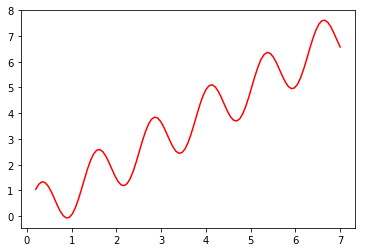

In [27]:
vizual([f], problem['ab'][0], problem['ab'][1])